### 1. Import

In [12]:
# import libs
import glob
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
from tqdm import tqdm

### 2. Data preparation

In [13]:
activity_folders = ['idle', 'running', 'walking', 'stairs']
path_data = 'data'

Read the files from the directory

In [14]:
def get_files(path_to, folder):
    custom_path = os.path.join(path_to, activity_folders[folder], '*.csv')
    filenames = glob.glob(custom_path)
    return filenames

In [19]:
idle_filenames = get_files(path_data, 0)
running_filenames = get_files(path_data, 1)
walking_filenames = get_files(path_data, 2)
stairs_filenames = get_files(path_data, 3)

In [20]:
idle_filenames


['data\\idle\\idle-1.csv',
 'data\\idle\\idle-10.csv',
 'data\\idle\\idle-100.csv',
 'data\\idle\\idle-1000.csv',
 'data\\idle\\idle-1001.csv',
 'data\\idle\\idle-1002.csv',
 'data\\idle\\idle-1003.csv',
 'data\\idle\\idle-1004.csv',
 'data\\idle\\idle-1005.csv',
 'data\\idle\\idle-1006.csv',
 'data\\idle\\idle-1007.csv',
 'data\\idle\\idle-1008.csv',
 'data\\idle\\idle-1009.csv',
 'data\\idle\\idle-101.csv',
 'data\\idle\\idle-1010.csv',
 'data\\idle\\idle-1011.csv',
 'data\\idle\\idle-1012.csv',
 'data\\idle\\idle-1013.csv',
 'data\\idle\\idle-1014.csv',
 'data\\idle\\idle-1015.csv',
 'data\\idle\\idle-1016.csv',
 'data\\idle\\idle-1017.csv',
 'data\\idle\\idle-1018.csv',
 'data\\idle\\idle-1019.csv',
 'data\\idle\\idle-102.csv',
 'data\\idle\\idle-1020.csv',
 'data\\idle\\idle-1021.csv',
 'data\\idle\\idle-1022.csv',
 'data\\idle\\idle-1023.csv',
 'data\\idle\\idle-1024.csv',
 'data\\idle\\idle-1025.csv',
 'data\\idle\\idle-1026.csv',
 'data\\idle\\idle-1027.csv',
 'data\\idle\\idle

count how many data files

In [16]:
print("There are:\n {0} idle {4}\n {1} running {4}\n {2} stairs {4}\n {3} walking {4}\n ".format(len(idle_filenames), len(running_filenames), len(stairs_filenames), len(walking_filenames), 'files'))

There are:
 1039 idle files
 3408 running files
 165 stairs files
 1850 walking files
 


Function to get files data and add the data to dataframe

In [17]:
def get_file_data(filenames):
    regex = re.compile('^[a-zA-Z]*')
    li = []
    for f in filenames:
        full_name = os.path.basename(f)
        df = pd.read_csv(f, index_col=None, header=0)

        # calculate mean value for coordinates in each file with activity
        ndf = df.copy().to_numpy()
        column_means = ndf.mean(axis=0)
        df['x_mean'] = column_means[0]
        df['y_mean'] = column_means[1]
        df['z_mean'] = column_means[2]

        # extracting from label only first word in the name
        new_name = regex.match(full_name).group()

        # adding label and source filename to the DF
        df['label'] = new_name
        df['filename'] = full_name

        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    return  df

In [18]:
dataframes = []

In [27]:
f = 'data\\idle\\idle-1.csv'
df = pd.read_csv(f, index_col=None, header=0)
# calculate mean value for coordinates in each file with activity
ndf = df.copy().to_numpy()
column_means = ndf.mean(axis=0)
df['x_mean'] = column_means[0]
df['y_mean'] = column_means[1]
df['z_mean'] = column_means[2]
df

,accelerometer_X,accelerometer_Y,accelerometer_Z,x_mean,y_mean,z_mean
0,1.000776,4.616021,8.576031,0.178448,0.167435,9.605697
1,0.718261,4.209007,8.446744,0.178448,0.167435,9.605697
2,-0.909797,-0.282516,9.203311,0.178448,0.167435,9.605697
3,5.099650,0.148441,8.418014,0.178448,0.167435,9.605697
4,1.762132,-0.162806,9.251195,0.178448,0.167435,9.605697
5,-0.086191,-0.148441,9.787497,0.178448,0.167435,9.605697
6,-0.062249,-0.191536,9.773131,0.178448,0.167435,9.605697
7,-0.057461,-0.114922,9.763555,0.178448,0.167435,9.605697
8,-0.124498,-0.162806,9.782708,0.178448,0.167435,9.605697
9,-0.138864,-0.124498,9.768343,0.178448,0.167435,9.605697


In [25]:
x_mean = column_means[0]
y_mean = column_means[1]
z_mean = column_means[2]

0.17844786666666668

In [28]:
column_standard_deviation = ndf.std(axis=0)

In [29]:
column_standard_deviation

array([1.01894178, 1.13814657, 0.40006418])

**Get idle accelerometer data**

In [ ]:
for i in tqdm(range(50), desc='Progress'):
    df_idle_data = get_file_data(idle_filenames)
df_idle_data.head()
dataframes.append(df_idle_data)

Progress:   4%|▍         | 2/50 [00:12<04:56,  6.17s/it]

**Get running accelerometer data**

In [ ]:
for i in tqdm(range(50), desc='Progress'):
    df_running_data = get_file_data(running_filenames)
df_running_data.head()
dataframes.append(df_running_data)

**Get stairs accelerometer data**

In [ ]:
for i in tqdm(range(50), desc='Progress'):
    df_stairs_data = get_file_data(stairs_filenames)
df_stairs_data.head()
dataframes.append(df_stairs_data)

**Get walking accelerometer data**

In [ ]:
for i in tqdm(range(50), desc='Progress'):
    df_walking_data = get_file_data(walking_filenames)
df_walking_data.head()
dataframes.append(df_walking_data)

In [28]:
dataframes_merged = pd.concat(objs=dataframes, axis=0, ignore_index=True)
dataframes_merged.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,label,filename
0,1.000776,4.616021,8.576031,idle,idle-1.csv
1,0.718261,4.209007,8.446744,idle,idle-1.csv
2,-0.909797,-0.282516,9.203311,idle,idle-1.csv
3,5.099650,0.148441,8.418014,idle,idle-1.csv
4,1.762132,-0.162806,9.251195,idle,idle-1.csv


calculate how many observations of each activity type

In [11]:
print(df_idle_data['label'].value_counts())
print(df_running_data['label'].value_counts())
print(df_stairs_data['label'].value_counts())
print(df_walking_data['label'].value_counts())

idle    31170
Name: label, dtype: int64
running    102240
Name: label, dtype: int64
stairs    4950
Name: label, dtype: int64
walking    55500
Name: label, dtype: int64


visualize accelerometer data frequency of the entire dataset

In [31]:
# Plots are X, Y, Z acceleration amplitudes of 4 activities.
import matplotlib.pyplot as plt

def plot_xyz_output(x, y, z, title_x, title_y, title_z):
    fig, axs = plt.subplots(3,1, figsize=(14,12))
    plt.subplots_adjust(hspace=0.5)
    axs[0].plot(x)
    axs[0].set_title(title_x)
    axs[0].set_xlabel('Samples')
    axs[0].set_ylabel('A[m/s^2]')
    axs[1].plot(y)
    axs[1].set_title(title_y)
    axs[1].set_xlabel('Samples')
    axs[1].set_ylabel('A[m/s^2]')
    axs[2].plot(z)
    axs[2].set_title(title_z)
    axs[2].set_xlabel('Samples')
    axs[2].set_ylabel('A[m/s^2]')
    plt.show()

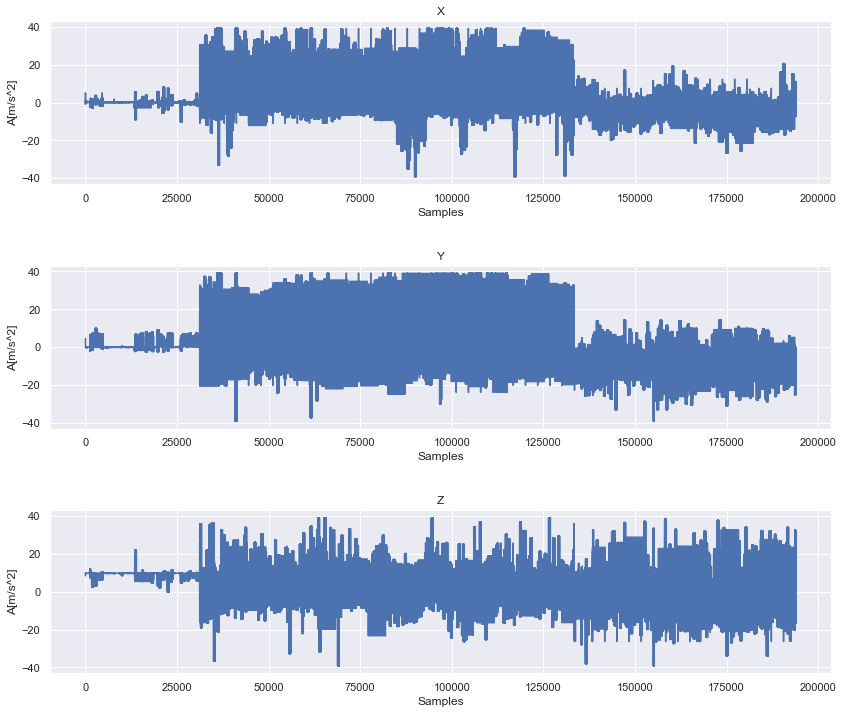

In [37]:
plot_xyz_output(x = dataframes_merged['accelerometer_X'], y = dataframes_merged['accelerometer_Y'], z = dataframes_merged['accelerometer_Z'], title_x='X', title_y= 'Y', title_z= 'Z')


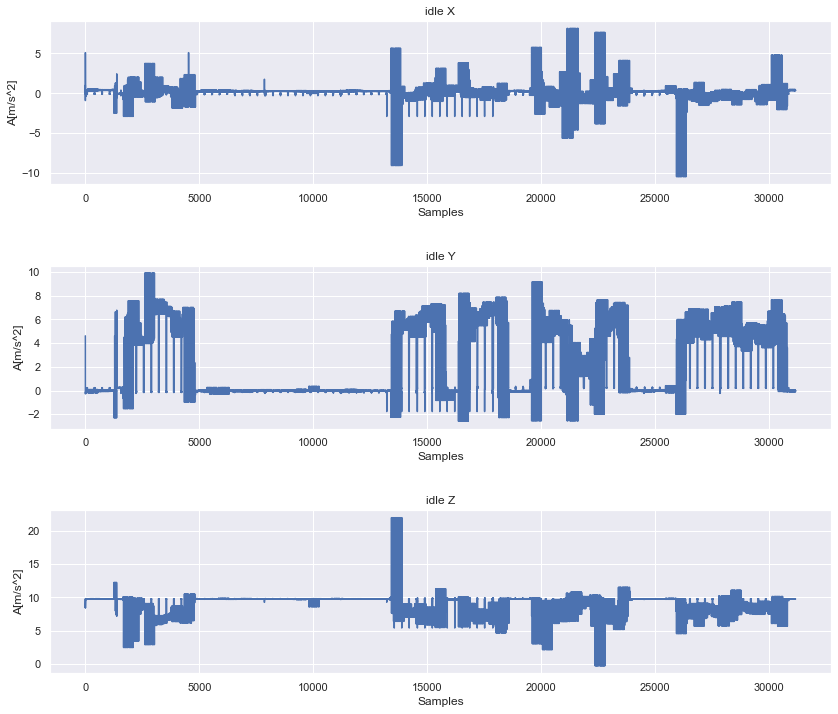

In [38]:
plot_xyz_output(x = df_idle_data['accelerometer_X'], y = df_idle_data['accelerometer_Y'], z = df_idle_data['accelerometer_Z'], title_x='idle X', title_y= 'idle Y', title_z= 'idle Z')

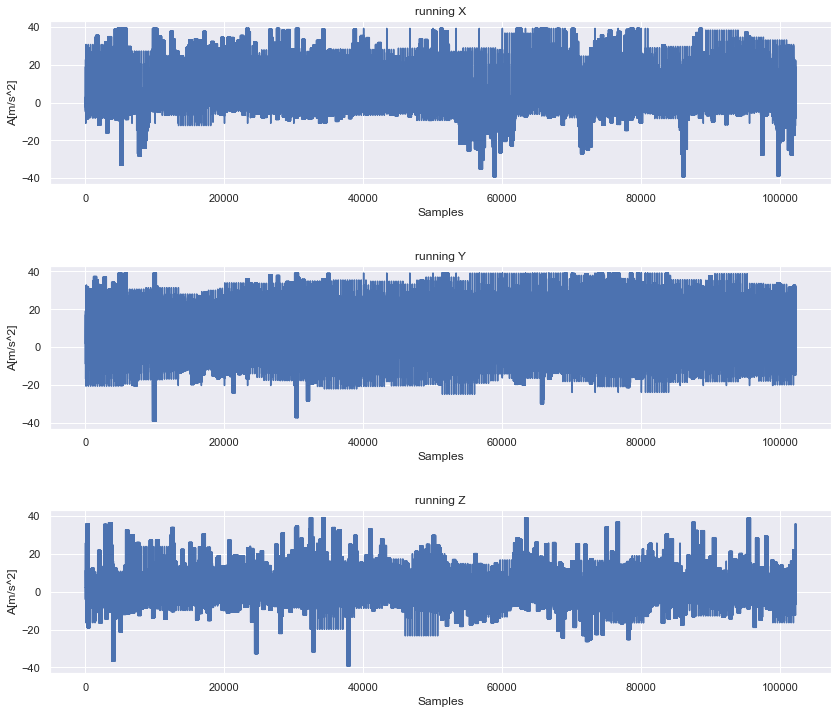

In [39]:
plot_xyz_output(x = df_running_data['accelerometer_X'], y = df_running_data['accelerometer_Y'], z = df_running_data['accelerometer_Z'], title_x='running X', title_y= 'running Y', title_z= 'running Z')

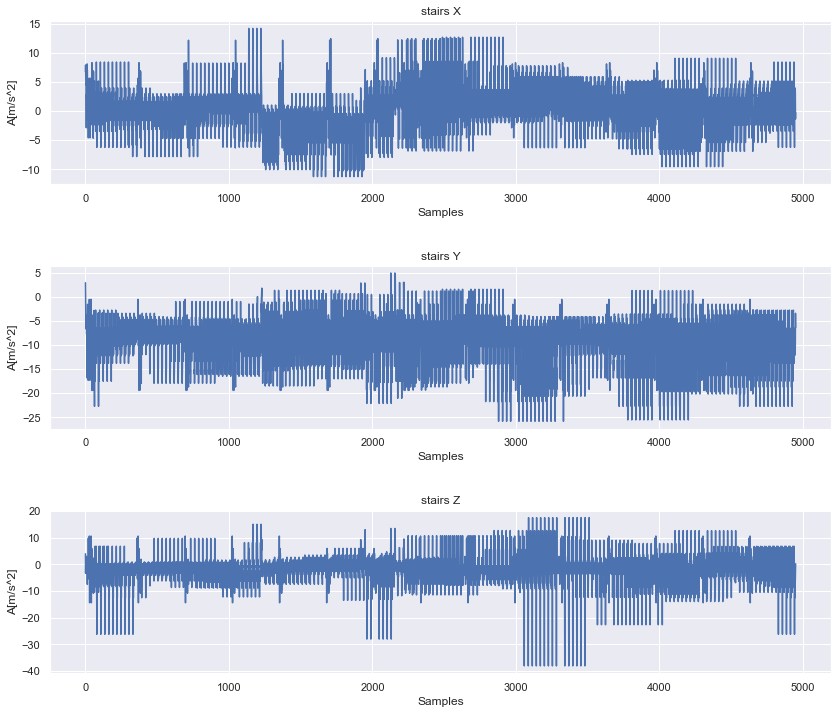

In [40]:
plot_xyz_output(x = df_stairs_data['accelerometer_X'], y = df_stairs_data['accelerometer_Y'], z = df_stairs_data['accelerometer_Z'], title_x='stairs X', title_y= 'stairs Y', title_z= 'stairs Z')

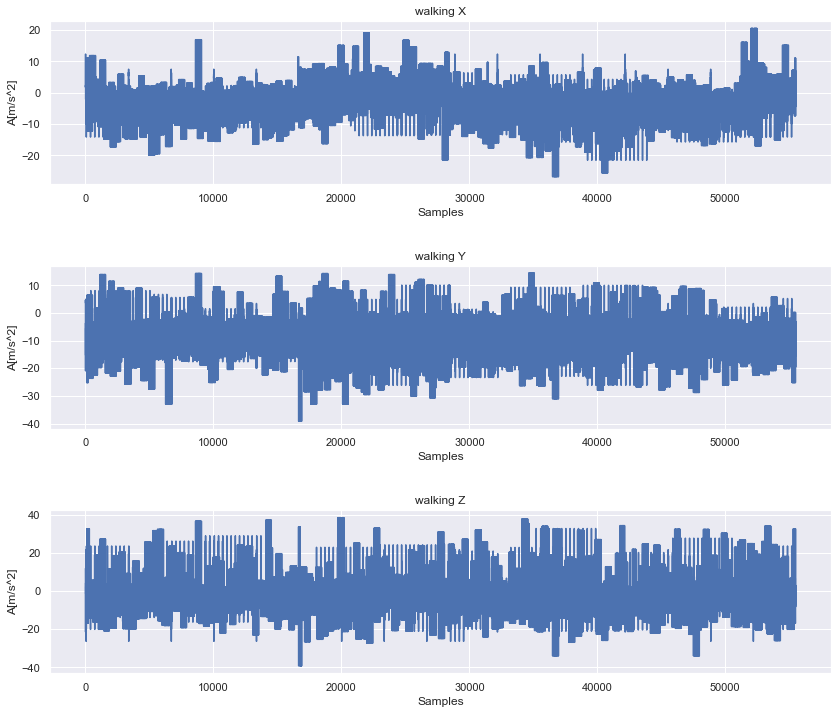

In [41]:
plot_xyz_output(x = df_walking_data['accelerometer_X'], y = df_walking_data['accelerometer_Y'], z = df_walking_data['accelerometer_Z'], title_x='walking X', title_y= 'walking Y', title_z= 'walking Z')

visualize accelerometer data frequency of 1 random sample file

In [32]:
import random as rand
random_idle_file_index = rand.randint(0, df_idle_data['label'].value_counts().loc['idle'])
rand_idle_file = df_idle_data.iloc[random_idle_file_index].loc['filename']
rand_idle_file = df_idle_data[df_idle_data['filename'] == rand_idle_file]
rand_idle_file

,accelerometer_X,accelerometer_Y,accelerometer_Z,label,filename
5850,0.138864,0.019154,9.792285,idle,idle-239.csv
5851,0.306458,-0.129287,9.763555,idle,idle-239.csv
5852,0.282516,0.162806,9.734824,idle,idle-239.csv
5853,0.186748,-0.301669,9.792285,idle,idle-239.csv
5854,0.272939,-0.043096,9.768343,idle,idle-239.csv
5855,0.234632,-0.014365,9.816227,idle,idle-239.csv
5856,0.244209,-0.215478,9.773131,idle,idle-239.csv
5857,0.234632,-0.086191,9.787497,idle,idle-239.csv
5858,0.215478,-0.076614,9.758766,idle,idle-239.csv
5859,0.287304,-0.076614,9.763555,idle,idle-239.csv


In [33]:
import random as rand

def get_random_file(dataframe, activity_type):
    # generate random index between 0 and the maximum value index of the dataframe
    random_file_index = rand.randint(0, dataframe['label'].value_counts().loc[activity_type])
    # get the filename behind the generated index
    rand_file = dataframe.iloc[random_file_index].loc['filename']
    # filter the dataframe by the defined filename and create a new dataframe
    df_rand_file = dataframe[dataframe['filename'] == rand_file]
    return df_rand_file

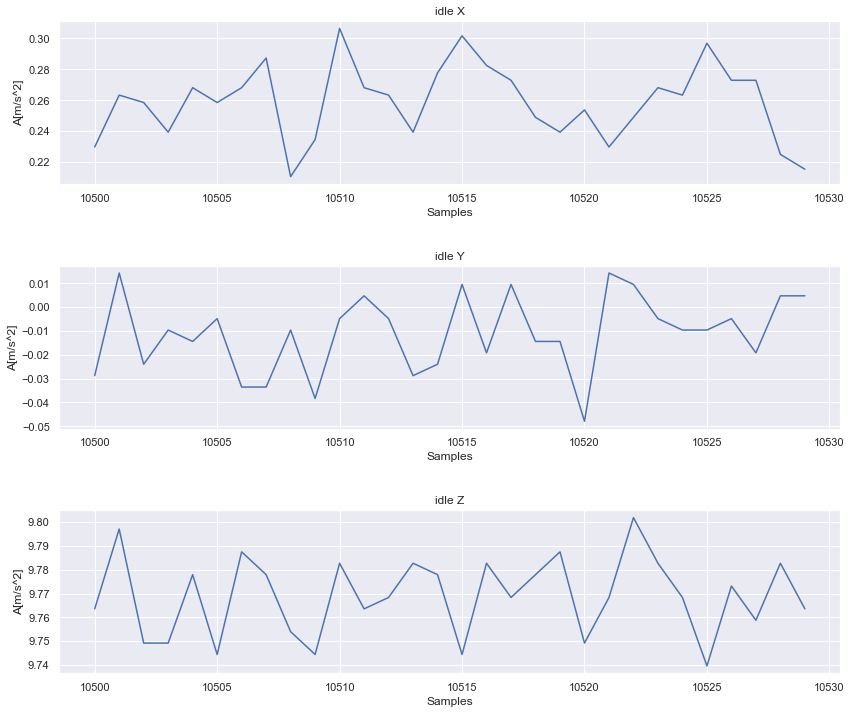

In [45]:
df_1_idle = get_random_file(df_idle_data, 'idle')
plot_xyz_output(x = df_1_idle['accelerometer_X'], y = df_1_idle['accelerometer_Y'], z = df_1_idle['accelerometer_Z'], title_x='idle X', title_y= 'idle Y', title_z= 'idle Z')

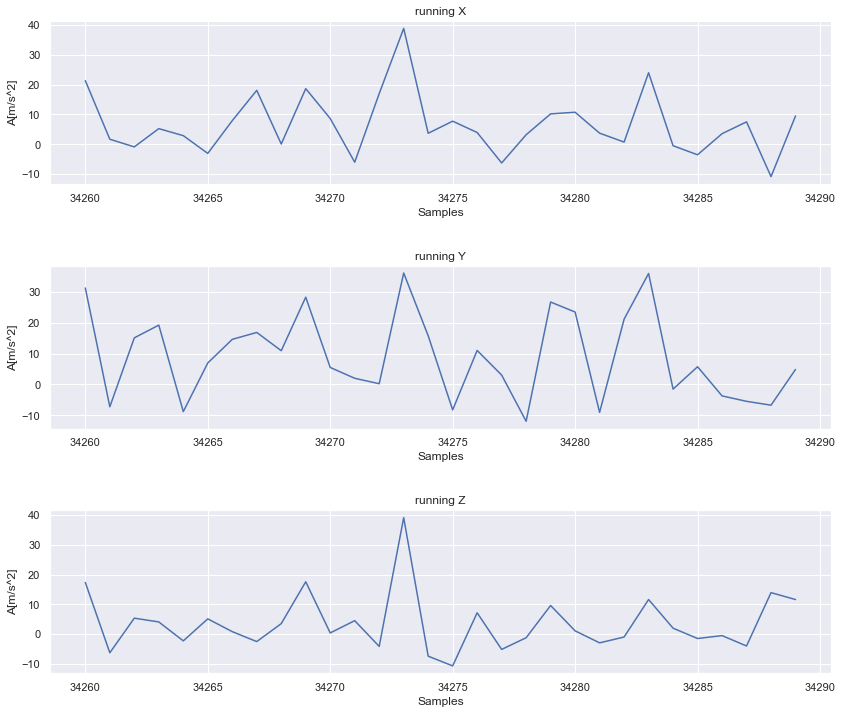

In [46]:
df_1_run = get_random_file(df_running_data, 'running')
plot_xyz_output(x = df_1_run['accelerometer_X'], y = df_1_run['accelerometer_Y'], z = df_1_run['accelerometer_Z'], title_x='running X', title_y= 'running Y', title_z= 'running Z')

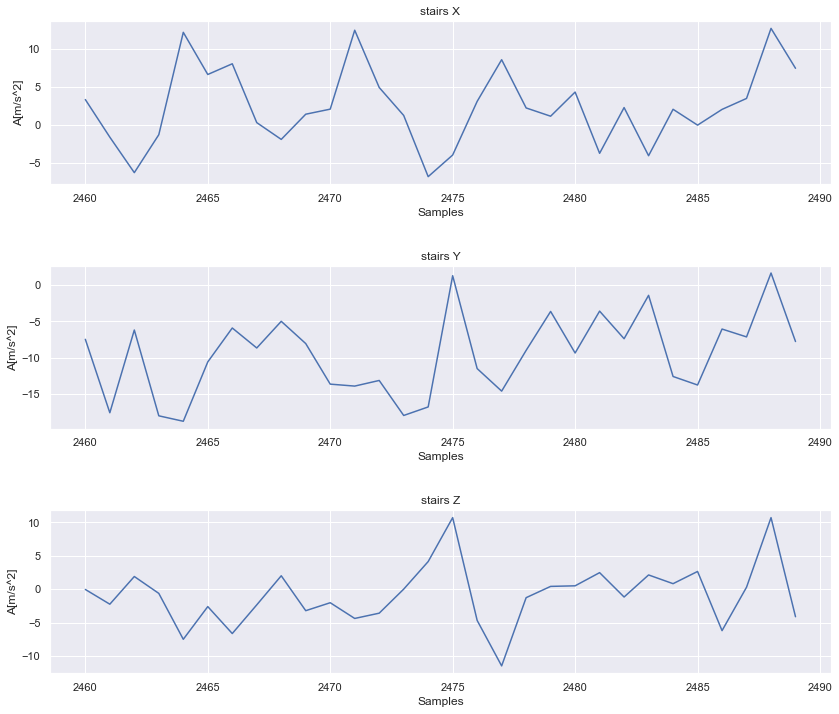

In [47]:
df_1_stair = get_random_file(df_stairs_data, 'stairs')
plot_xyz_output(x = df_1_stair['accelerometer_X'], y = df_1_stair['accelerometer_Y'], z = df_1_stair['accelerometer_Z'], title_x='stairs X', title_y= 'stairs Y', title_z= 'stairs Z')

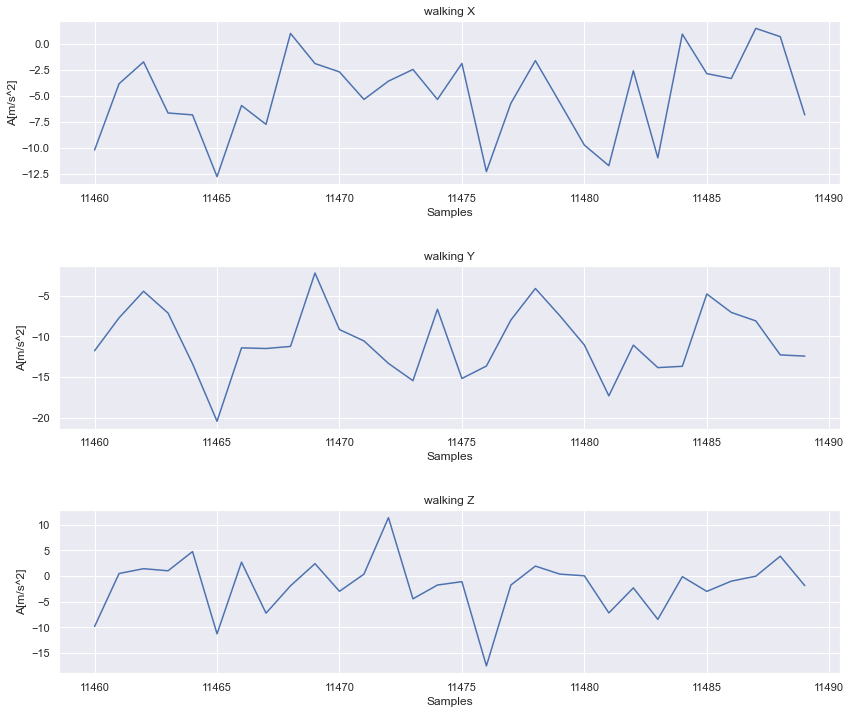

In [48]:
df_1_walk = get_random_file(df_walking_data, 'walking')
plot_xyz_output(x = df_1_walk['accelerometer_X'], y = df_1_walk['accelerometer_Y'], z = df_1_walk['accelerometer_Z'], title_x='walking X', title_y= 'walking Y', title_z= 'walking Z')

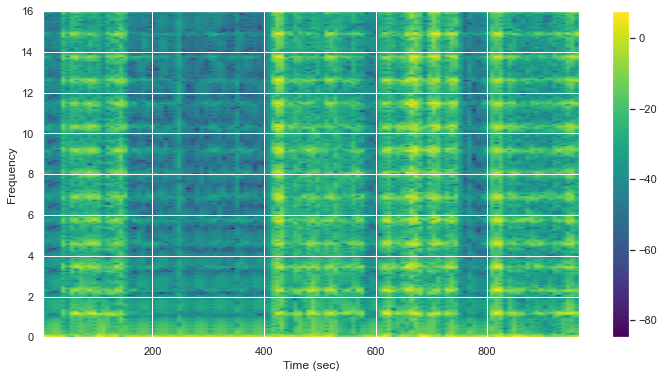

In [58]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 512
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

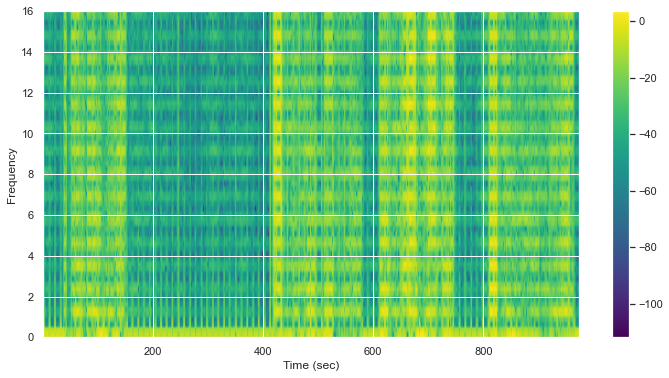

In [47]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

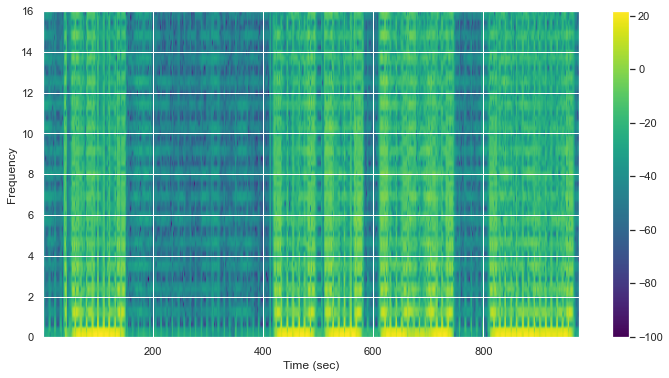

In [29]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Y'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

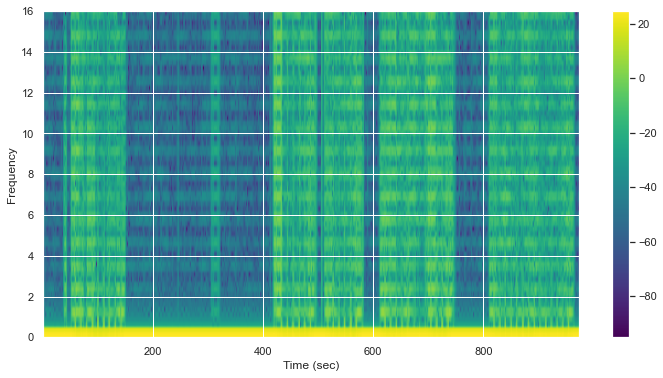

In [30]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Z'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

<ipython-input-53-7109f067aed9>:4: UserWarning: Only one segment is calculated since parameter NFFT (=128) >= signal length (=30).
  powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')


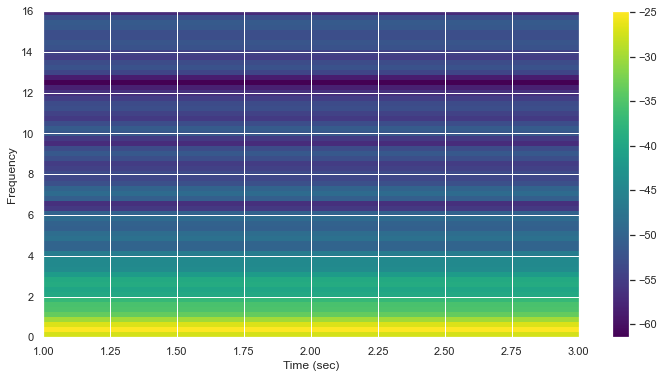

In [53]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [14]:
from scipy import fftpack
from numpy.fft import fft
def new_display_fft(signal, sampling_freq, title):
    # fig, axs = plt.subplots(3,1, figsize=(14,12))
    N = signal.shape[0]
    T = 1.0 / sampling_freq
    x = np.linspace(0, N*T, N)
    y = signal
    yf = fft(signal)
    f_s = sampling_freq
    yf = np.abs(yf) * 2.0 / N  # Normalize the wave
    #xf = np.linspace(0, 1 / (2.0*T), N)
    xf = fftpack.fftfreq(len(signal)) * f_s
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    ax.set_xlim(0, sampling_freq / 2)
    ax.plot(xf,yf)
    plt.show()

In [1]:
new_display_fft(df_idle_data["accelerometer_X"], 32.0, "idle x")
new_display_fft(df_walking_data["accelerometer_X"], 32.0, "walking x")
new_display_fft(df_stairs_data["accelerometer_X"], 32.0, "stairs x")
new_display_fft(df_running_data["accelerometer_X"], 32.0, "running x")
new_display_fft(df_idle_data["accelerometer_Y"], 32.0, "idle y")
new_display_fft(df_walking_data["accelerometer_Y"], 32.0, "walking y")
new_display_fft(df_stairs_data["accelerometer_Y"], 32.0, "stairs y")
new_display_fft(df_running_data["accelerometer_Y"], 32.0, "running y")
new_display_fft(df_idle_data["accelerometer_Z"], 32.0, "idle z")
new_display_fft(df_walking_data["accelerometer_Z"], 32.0, "walking z")
new_display_fft(df_stairs_data["accelerometer_Z"], 32.0, "stairs z")
new_display_fft(df_running_data["accelerometer_Z"], 32.0, "running z")


NameError: name 'new_display_fft' is not defined

## Filter design

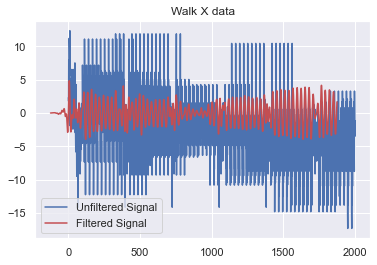

In [34]:
from scipy.signal import firwin, lfilter
def bandpass_filter(signal, sample_rate, low_f, high_f, numt):

    # The cutoff frequency of the filter: 6KHz
    low_f = low_f / (sample_rate * 2)
    high_f = high_f / (sample_rate * 2)
    numtaps = numt
    delay = 0.5 * numtaps
    # Use firwin to create a lowpass FIR filter
    fir_coeff = firwin(numtaps, [low_f, high_f], pass_zero=False)
    # Use lfilter to filter the signal with the FIR filter
    filtered_signal = lfilter(fir_coeff, 1.0, signal)
    return filtered_signal, delay

newx, delay = bandpass_filter(df_walking_data['accelerometer_X'], 32.0, 2.0, 8.0, 250)

plt.plot(df_walking_data['accelerometer_X'][0:2000], label='Unfiltered Signal')
t = np.arange(len(df_walking_data['accelerometer_X'][0:2000]))
plt.plot((t-delay)[0:2000], newx[0:2000], '-r', label='Filtered Signal')
plt.title("Walk X data")
plt.legend()
plt.show()

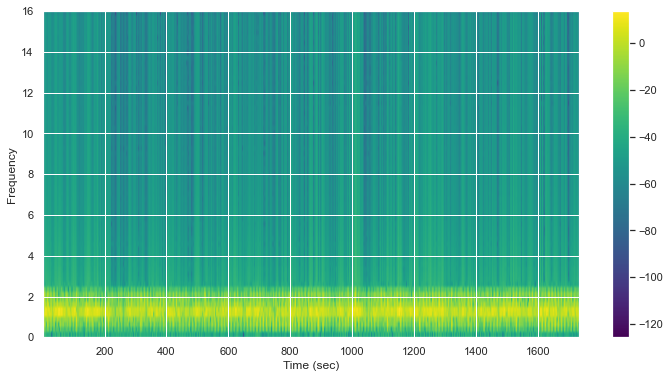

In [53]:
plt.subplots(1,1, figsize=(12,6))
NFFT=128
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(newx, Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [49]:
## Collect the filtered data
filtered_idle_x, delay = bandpass_filter(df_idle_data["accelerometer_X"], 32.0, 0.5, 8.0, 250)
filtered_idle_y, delay = bandpass_filter(df_idle_data["accelerometer_Y"], 32.0, 0.5, 4.0, 250)
filtered_idle_z, delay = bandpass_filter(df_idle_data["accelerometer_Z"], 32.0, 0.5, 6.0, 250)

filtered_walking_x, delay = bandpass_filter(df_walking_data["accelerometer_X"], 32.0, 0.5, 8.0, 250)
filtered_walking_y, delay = bandpass_filter(df_walking_data["accelerometer_Y"], 32.0, 0.5, 4.0, 250)
filtered_walking_z, delay = bandpass_filter(df_walking_data["accelerometer_Z"], 32.0, 0.5, 4.0, 250)

filtered_running_x, delay = bandpass_filter(df_running_data["accelerometer_X"], 32.0, 0.5, 8.0, 250)
filtered_running_y, delay = bandpass_filter(df_running_data["accelerometer_Y"], 32.0, 0.5, 2.0, 250)
filtered_running_z, delay = bandpass_filter(df_running_data["accelerometer_Z"], 32.0, 0.5, 4.0, 250)

filtered_stairs_x, delay = bandpass_filter(df_stairs_data["accelerometer_X"], 32.0, 0.5, 8.0, 250)
filtered_stairs_y, delay = bandpass_filter(df_stairs_data["accelerometer_Y"], 32.0, 0.5, 2.0, 250)
filtered_stairs_z, delay = bandpass_filter(df_stairs_data["accelerometer_Z"], 32.0, 0.5, 4.0, 250)

In [57]:
def filter_data(df, sample_rate, low_f, high_f, numt):

    filtered_running_x, delay = bandpass_filter(df["accelerometer_X"], sample_rate, low_f, high_f, numt)
    filtered_running_y, delay = bandpass_filter(df["accelerometer_Y"], sample_rate, low_f, high_f, numt)
    filtered_running_z, delay = bandpass_filter(df["accelerometer_Z"], sample_rate, low_f, high_f, numt)

    filtered_data = np.concatenate((filtered_running_x, filtered_running_y, filtered_running_z), axis=0)
    return  filtered_data

In [59]:
test = filter_data(df_idle_data, 32.0, 0.5, 8.0, 250)
test.shape

(93510,)

In [52]:
np.concatenate?
# filtered_stairs_x

## Modeling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [31]:
X_data = dataframes_merged[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
Y_prediction = dataframes_merged[['label']]

In [43]:
# splitting dataset for training and evaluations
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, Y_prediction, random_state = 42, shuffle= True)

In [41]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(145395, 3)
(48465, 3)
(145395, 1)
(48465, 1)


#### Modeling with SVC

In [40]:
model = SVC()

In [ ]:
ytrain.values.ravel()

In [41]:
model.fit?

In [ ]:
for i in tqdm(range(50), desc='Progress'):
    model.fit(Xtrain, ytrain.values.ravel() )

Progress:   0%|          | 0/50 [00:00<?, ?it/s]d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Progress:   2%|▏         | 1/50 [07:57<6:30:10, 477.77s/it]d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Progress:   4%|▍         | 2/50 [15:30<6:10:16, 462.85s/it]d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

In [ ]:
y_model = model.predict(Xtest)